In [28]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import string
import geopandas
import re, calendar, time, datetime

In [39]:
df = pd.read_csv("../../data/x_train_no_out_dist.csv")
df_original = pd.read_csv("../../data/train.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_0,passenger_count_1,...,passenger_count_6,passenger_count_7,passenger_count_8,passenger_count_9,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_date,pickup_hour,pickup_weekday,dis
0,id3265360,2,2016-04-10 05:35:23,2016-04-10 05:45:47,-74.000786,40.718666,-73.993324,40.762917,0,0,...,0,0,0,0,1,0,2016-04-10,5,6,2.185876
1,id0149433,1,2016-02-20 01:11:50,2016-02-20 01:19:52,-74.000603,40.735878,-73.988289,40.727745,0,1,...,0,0,0,0,1,0,2016-02-20,1,5,1.618498
2,id1957227,2,2016-04-09 12:43:52,2016-04-09 12:52:29,-73.996178,40.768246,-73.991699,40.759571,0,1,...,0,0,0,0,1,0,2016-04-09,12,5,0.763916
3,id0550182,1,2016-04-23 10:30:39,2016-04-23 10:34:23,-73.984444,40.764641,-73.980377,40.770645,0,1,...,0,0,0,0,1,0,2016-04-23,10,5,0.636374
4,id2058362,1,2016-05-13 12:24:28,2016-05-13 12:55:33,-74.011780,40.707314,-73.976707,40.752495,0,0,...,0,0,0,0,1,0,2016-05-13,12,4,5.283654


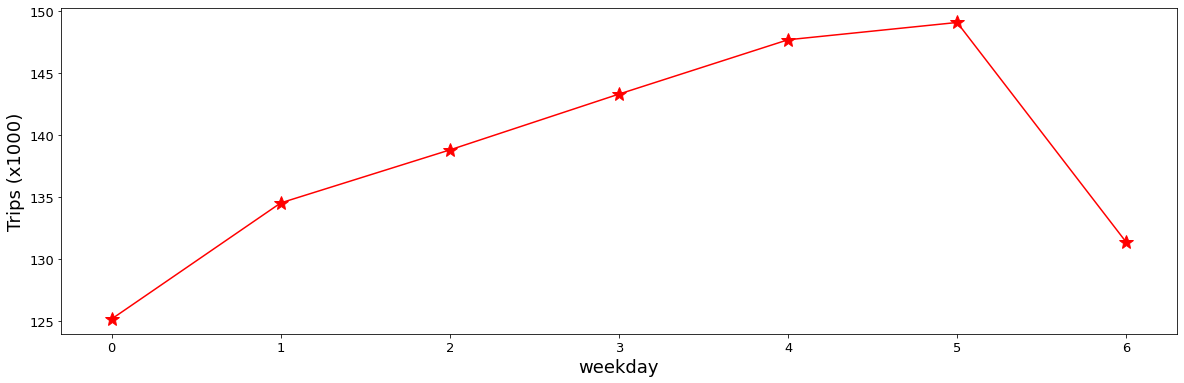

In [40]:
nomalize=1000 # tirps
fig, ax = plt.subplots(ncols=1, sharey=False)
fig.set_size_inches(20,6)
ax.plot(df.groupby('pickup_weekday').count()['vendor_id']/nomalize,  'r-*',  markersize=15,  label='Pickup')
ax.tick_params(labelsize=13)
ax.set_xlabel( name, fontsize=18)
ax.set_ylabel('Trips (x%d)'%nomalize, fontsize=18)
plt.show()

In [41]:
df['pickup_time'] = pd.to_datetime(df['pickup_datetime']).dt.hour + pd.to_datetime(df['pickup_datetime']).dt.minute/60 + pd.to_datetime(df['pickup_datetime']).dt.second/3600
df['dropoff_time'] = pd.to_datetime(df['dropoff_datetime']).dt.hour + pd.to_datetime(df['dropoff_datetime']).dt.minute/60 + pd.to_datetime(df['dropoff_datetime']).dt.second/3600

In [42]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_0,passenger_count_1,...,passenger_count_8,passenger_count_9,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_date,pickup_hour,pickup_weekday,dis,pickup_time,dropoff_time
0,id3265360,2,2016-04-10 05:35:23,2016-04-10 05:45:47,-74.000786,40.718666,-73.993324,40.762917,0,0,...,0,0,1,0,2016-04-10,5,6,2.185876,5.589722,5.763056
1,id0149433,1,2016-02-20 01:11:50,2016-02-20 01:19:52,-74.000603,40.735878,-73.988289,40.727745,0,1,...,0,0,1,0,2016-02-20,1,5,1.618498,1.197222,1.331111
2,id1957227,2,2016-04-09 12:43:52,2016-04-09 12:52:29,-73.996178,40.768246,-73.991699,40.759571,0,1,...,0,0,1,0,2016-04-09,12,5,0.763916,12.731111,12.874722
3,id0550182,1,2016-04-23 10:30:39,2016-04-23 10:34:23,-73.984444,40.764641,-73.980377,40.770645,0,1,...,0,0,1,0,2016-04-23,10,5,0.636374,10.510833,10.573056
4,id2058362,1,2016-05-13 12:24:28,2016-05-13 12:55:33,-74.011780,40.707314,-73.976707,40.752495,0,0,...,0,0,1,0,2016-05-13,12,4,5.283654,12.407778,12.925833


In [43]:
def make_hist( X, xmax=None, xmin=None, binw=1, xlabel='Input', ylabel='Counts', 
              xunit='', edgecolor='black', tightLabel=False, centerLabel=False, debug=False, log=False, **hist_kwds ):    
    if not xmax:
        xmax = max(X)+binw
    if not xmin:
        xmin = min(X) if (min(X) < 0) or (min(X) >=1) else 0 
        
    if xmax <= xmin: 
        xmax = max(X)+binw
        xmin = min(X) if (min(X) < 0) or (min(X) >=1) else 0 

    hist_info_ = plt.hist( 
                           x = X[ (X <= xmax) & (X >= xmin) ],
                           bins = np.arange(xmin, xmax+binw, binw), # Due to end 2 bins are 1, hist will combined them to a bin. 
                           edgecolor = edgecolor,
                           log=log,
                           **hist_kwds
                         )
    
    if xunit == '': 
        ylabel = ylabel+' / %.2f'%(binw)
    else:
        xlabel = xlabel+' [%s]'%(xunit)
        ylabel = ylabel+' / %.2f %s'%(binw, xunit)
    plt.tick_params(labelsize=20)
    plt.xlabel(xlabel, fontsize=25)
    plt.ylabel(ylabel, fontsize=25)
    plt.ylim(ymin = 0.5 if log else 0)
    
    # Show label be bin by bin
    if tightLabel: 
        plt.xticks(hist_info_[1])
    
    # Make label be in bins' center
    if tightLabel and centerLabel:
        ax_min = min(hist_info_[1])
        ax_max = max(hist_info_[1])
        ax_wth = (hist_info_[1][1]-hist_info_[1][0])/2.
        newrange = np.arange(ax_min, ax_max+ax_wth, ax_wth)
        newnames, n = [], 0
        for i in range(len(newrange)):
            if i%2 == 0: 
                newnames.append('')
            elif n < len(hist_info_[1]): 
                v = hist_info_[1][n] if hist_info_[1][n]%1 != 0 else int(hist_info_[1][n])
                newnames.append(v)
                n+=1   
        plt.xticks(newrange, newnames)
        if debug: print(ax_min, ax_max, ax_wth, newrange)

    return hist_info_

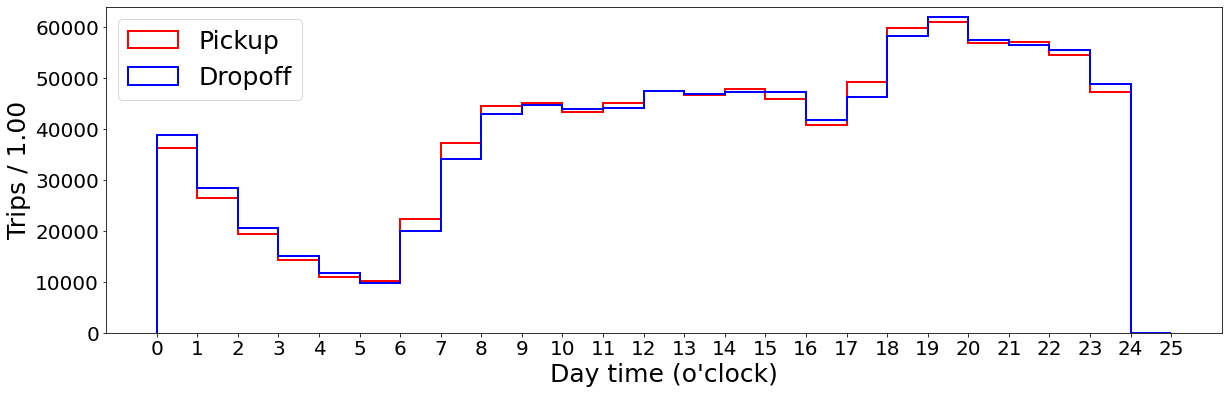

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Pickup,36228,26383,19390,14324,10900,10223,22396,37330,44580,45170,...,47954,45852,40716,49222,59906,60978,56892,57090,54565,47174
Dropoff,38884,28356,20581,15049,11750,9737,20052,34094,42999,44805,...,47366,47218,41791,46213,58210,62039,57474,56577,55464,48884


In [44]:
plt.figure(figsize=(20,6))
pick_info = make_hist(df['pickup_time'].values,  xmax=25, histtype='step', edgecolor='r', linewidth=2, xlabel="Day time (o'clock)", ylabel="Trips", label='Pickup',  tightLabel=True)
drop_info = make_hist(df['dropoff_time'].values, xmax=25, histtype='step', edgecolor='b', linewidth=2, xlabel="Day time (o'clock)", ylabel="Trips", label='Dropoff', tightLabel=True)
plt.legend(loc='upper left', fontsize=25)
plt.show()

df_trips_daytime = pd.DataFrame(data=[pick_info[0][:-1].astype(int), drop_info[0][:-1].astype(int)], columns=range(0,24,1), index=['Pickup','Dropoff'])
df_trips_daytime.head()

In [ ]:
import seaborn

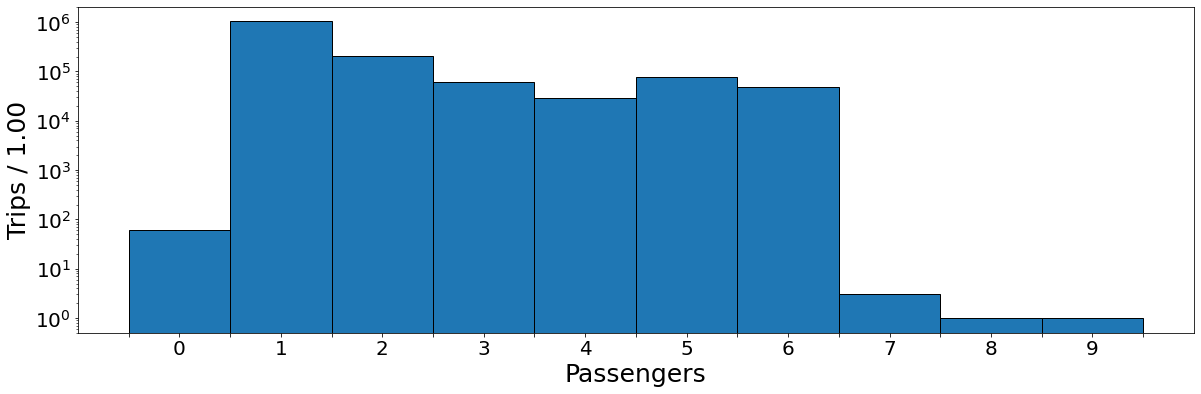

In [49]:
plt.figure(figsize=(20,6))
hist_info = make_hist(df_original['passenger_count'].values, xlabel='Passengers', ylabel='Trips', log=True, tightLabel=True, centerLabel=True)
plt.show()

In [59]:
def draw_map( x, y, name, zoom=.1 ):
    cutmap = zoom/100
    x_max, x_min = x.quantile(1-cutmap), x.quantile(cutmap)
    y_max, y_min = y.quantile(1-cutmap), y.quantile(cutmap)

    s = plt.scatter( x=x[(x>x_min) & (x<x_max) & (y<y_max) & (y>y_min)], 
                     y=y[(x>x_min) & (x<x_max) & (y<y_max) & (y>y_min)], 
                     s=5, alpha=0.3)

    plt.tick_params(labelsize=18)
    #plt.title(name, fontsize=18 )
    plt.xlabel('Longitude', fontsize=18)
    plt.ylabel('Latitude',  fontsize=18)
    return s, [x_max, x_min], [y_max, y_min] 

In [64]:
x_pick, x_drop = df['pickup_longitude'], df['dropoff_longitude']
y_pick, y_drop = df['pickup_latitude'],  df['dropoff_latitude']
xmax = x_pick.quantile(0.95)
xmin = x_pick.quantile(0.05)
ymax = y_pick.quantile(0.95)
ymin = y_pick.quantile(0.05)
print(xmax, xmin, ymax, ymin)

-73.94504547119139 -74.00682830810547 40.78861618041992 40.71321487426758


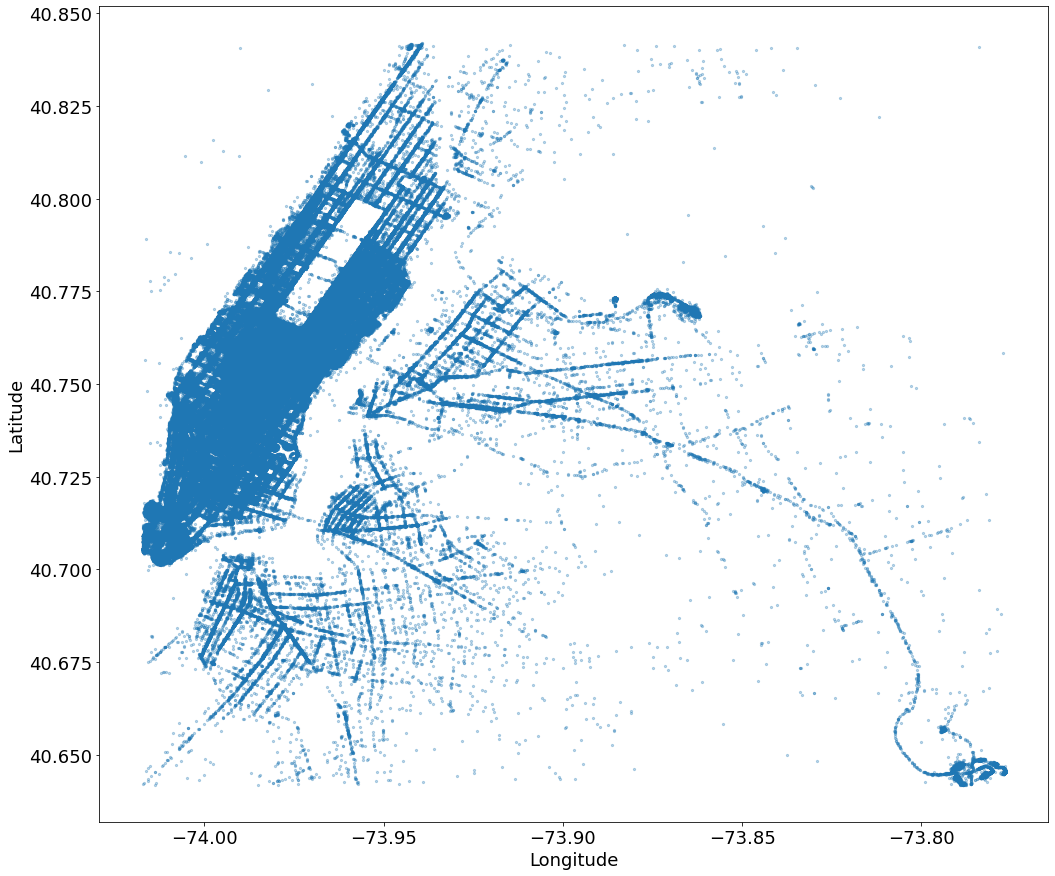

In [65]:
plt.figure(figsize=(17,15))
picks = draw_map(x_pick, y_pick, 'Pickup')

plt.show()

In [69]:
picks

(<matplotlib.collections.PathCollection at 0x1e48b113c48>,
 [-73.77672576904298, -74.0172119140625],
 [40.84185062408447, 40.64189910888672])